# 1) This first part is only accessing in a list all the tickers in our fund, via a csv

In [1]:
import csv
with open('IBB_holdings.csv', 'r') as csvfile:
    file = csv.reader(csvfile,delimiter=' ')
    c=0
    list_tickers=[]
    for row in file:
        if c>=11:
            list_tickers.append(row[0].split(',')[0])
        c+=1
            
csvfile.close()

# 2) The following cells show how a dataframe can be manipulated

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [3]:
symbol = 'WIKI/NSTG'
date=datetime.date
df = web.DataReader(symbol, 'quandl', '2015-01-01', str(date.today()))
df.head()



,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-07,6.80,6.93,6.62,6.69,84943.0,0.0,1.0,6.80,6.93,6.62,6.69,84943.0
2018-02-06,6.54,6.83,6.50,6.80,120322.0,0.0,1.0,6.54,6.83,6.50,6.80,120322.0
2018-02-05,6.91,7.02,6.54,6.71,132698.0,0.0,1.0,6.91,7.02,6.54,6.71,132698.0
2018-02-02,7.18,7.36,6.94,6.95,119567.0,0.0,1.0,7.18,7.36,6.94,6.95,119567.0
2018-02-01,7.49,7.55,7.07,7.24,138886.0,0.0,1.0,7.49,7.55,7.07,7.24,138886.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-08,13.37,13.500,12.88,13.09,54773.0,0.0,1.0,13.37,13.500,12.88,13.09,54773.0
2015-01-07,13.85,13.850,12.97,13.37,51169.0,0.0,1.0,13.85,13.850,12.97,13.37,51169.0
2015-01-06,14.32,14.446,13.36,13.69,56461.0,0.0,1.0,14.32,14.446,13.36,13.69,56461.0
2015-01-05,13.94,14.740,13.94,14.20,72237.0,0.0,1.0,13.94,14.740,13.94,14.20,72237.0
2015-01-02,13.99,14.240,13.33,13.86,55970.0,0.0,1.0,13.99,14.240,13.33,13.86,55970.0


In [5]:
# filter on one day of data
day = df[ '2018-01-19' ]

In [6]:
# let's flip the time series
df_flipped = df.sort_index( ascending=True )

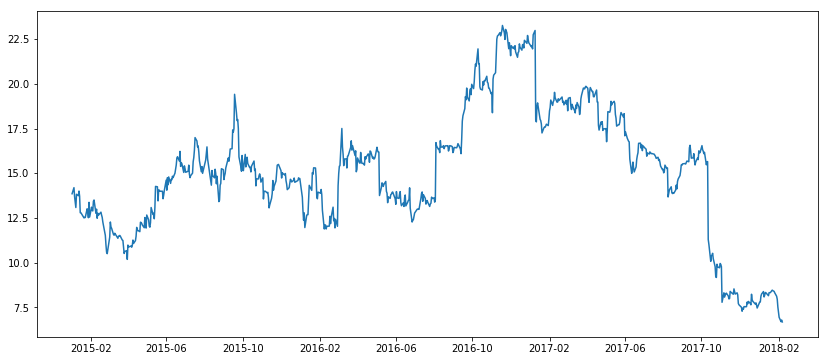

In [7]:
#plot a single series
plt.plot( df[ 'Close' ] );
# or multiple
#plt.plot( day[ ['High', 'Low' ] ] )

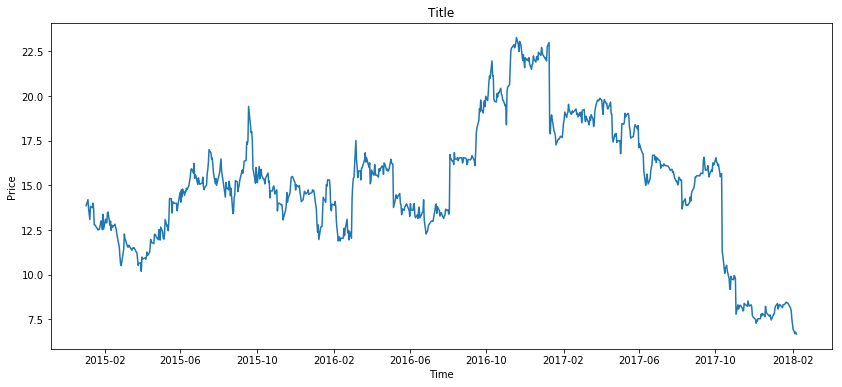

In [8]:
# maybe with some labels 
plt.plot( df[ 'Close' ] )
plt.title( 'Title' )
plt.xlabel( 'Time' )
plt.ylabel( 'Price' );

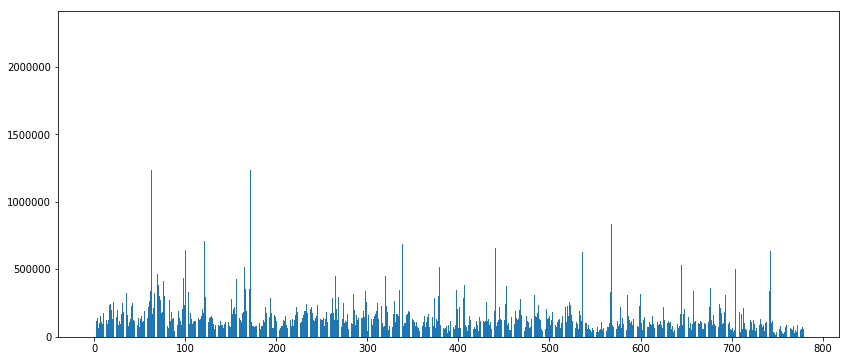

In [9]:
#Volume chart
xaxis = np.arange( len(df['Volume']) )
plt.bar( xaxis , df[ 'Volume' ] );

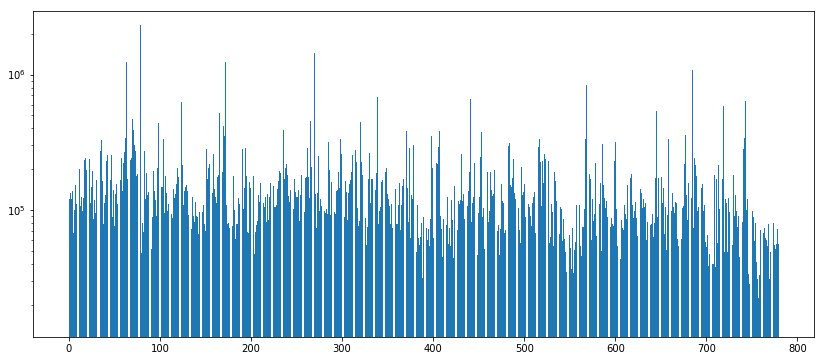

In [10]:
# Maybe use log?
plt.bar( xaxis, df[ 'Volume' ], log=True );

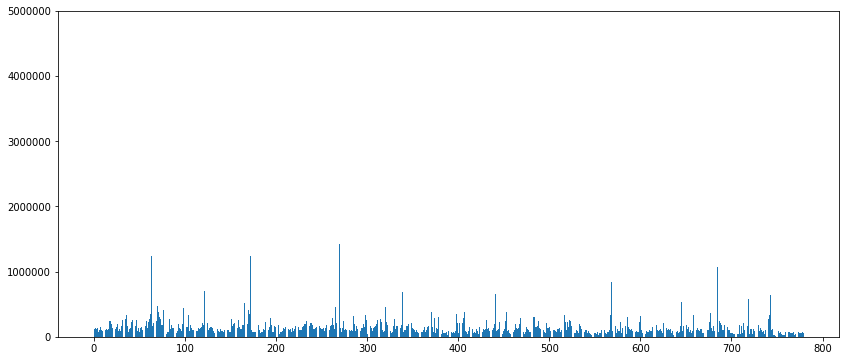

In [11]:
# or maybe filter?
plt.ylim( 0, 5000000 )
plt.bar( xaxis, df[ 'Volume' ] );

# 3) We now want to download the data of all tickers as dataframes

In [12]:
# Setting up the variables

start_date = '2016-01-01'
end_date = '2018-01-01'

# Note: ticker with index 156 is BLKFDS, and ticker with index 198 is USD,
# index 199 is END (meaning end of csv)

nb_tickers = len(list_tickers)-1
list_dataframes=[None]*(nb_tickers)

In [13]:
#On Yahoo
still_missing = nb_tickers - 2
passages=0

while still_missing > 0 :
    passages += 1
    print("harvest number " , passages)
    for i in range (nb_tickers - 1):   # nb_tickers - 1 excludes USD
        if i != 156 and type(list_dataframes[i]) == type(None):   
            symbol = list_tickers[i]
            try:
                df = web.DataReader(symbol, 'yahoo' , start_date ,end_date)
                list_dataframes[i] = df
                still_missing -= 1
            except:
                print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])

harvest number  1
Oops!  That was no valid ticker.  Try again... CELG
Oops!  That was no valid ticker.  Try again... ALNY
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... SGEN
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... TECH
Oops!  That was no valid ticker.  Try again... TSRO
Oops!  That was no valid ticker.  Try again... GWPH
Oops!  That was no valid ticker.  Try again... PTLA
Oops!  That was no valid ticker.  Try again... CLVS
Oops!  That was no valid ticker.  Try again... FMI
Oops!  That was no valid ticker.  Try again... OPK
Oops!  That was no valid ticker.  Try again... AIMT
Oops!  That was no valid ticker.  Try again... SGMO
Oops!  That was no valid ticker.  Try again... ARNA
Oops!  That was no valid ticker.  Try again... IMGN
Oops!  That was no valid ticker.  Try again... CTMX
Oops!  That was no valid ticker.  Try again... A

In [14]:
#The tickers printed are the one missing from every calls!

for i in range(nb_tickers):   
    if type(list_dataframes[i]) == type(None) :
        print(list_tickers[i])

BLKFDS
USD


# 4) Finally, we can download in a new folder all this information for future use, to avoid downloading them from the web again

In [15]:
#Download of the dataframes as as many csv's (for now)

import os

cur_dir = os.getcwd()
aimed_directory=cur_dir+'\\Data'
if not os.path.exists(aimed_directory):
    os.makedirs(aimed_directory)

for i in range (nb_tickers - 1):   # nb_tickers - 1 excludes USD
    if i != 156 :   
        file_name='csv_'+list_tickers[i]+'_from_'+start_date+'_to_'+end_date+".csv"
        string = aimed_directory+'\\'+file_name
        list_dataframes[i].to_csv(string , sep=',')

# 5) This program is not (yet) collecting the two tickers that are not equities : BLKFDS and USD